<a href="https://colab.research.google.com/github/iamBehzad/Five-Project-Advanced-Deep-Learning-Low-Level-Modeling/blob/main/Project02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf 
from tensorflow import keras
from tensorflow.keras import layers
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from keras import metrics
import time
import pandas as pd

In [ ]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

print("X_train.shape = ",x_train.shape)
print("y_train.shape = ",y_train.shape)
print("X_test.shape = ",x_test.shape)
print("y_test.shape = ",y_test.shape)

X_train.shape =  (50000, 32, 32, 3)
y_train.shape =  (50000, 1)
X_test.shape =  (10000, 32, 32, 3)
y_test.shape =  (10000, 1)


In [ ]:
x_train, x_test = x_train/255.0 , x_test/255.0

In [ ]:
def f_beta_score(beta):
    def f_beta(y_true, y_pred):
        y_true = tf.cast(y_true, tf.int64)   # Cast y_true to int64

        true_positives = tf.math.count_nonzero(tf.math.logical_and(tf.equal(y_true, tf.argmax(y_pred, axis=-1)), tf.not_equal(y_true, 10)), axis=0)
        predicted_positives = tf.math.count_nonzero(tf.not_equal(tf.argmax(y_pred, axis=-1), 10), axis=0)
        actual_positives = tf.math.count_nonzero(tf.not_equal(y_true, 10), axis=0)
        precision = tf.cast(true_positives, dtype=tf.float32) / (tf.cast(predicted_positives, dtype=tf.float32) + tf.keras.backend.epsilon())
        recall = tf.cast(true_positives, dtype=tf.float32) / (tf.cast(actual_positives, dtype=tf.float32) + tf.keras.backend.epsilon())
        return tf.reduce_mean(((1 + beta**2) * precision * recall) / (beta**2 * precision + recall + tf.keras.backend.epsilon()), axis=0)
    return f_beta

In [ ]:
model = keras.models.Sequential([
  keras.layers.Flatten(input_shape=[32, 32, 3]),
  keras.layers.Dense(50, activation ="relu"),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(50, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(50, activation='relu'),
  keras.layers.BatchNormalization(),
  keras.layers.Dense(10, activation="softmax")
])

print(model.summary())
lr = 0.0001

model.compile(
    optimizer=keras.optimizers.Adam(learning_rate=lr),
    loss="sparse_categorical_crossentropy",
    metrics=[f_beta_score(2),"accuracy"]
)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 50)                153650    
                                                                 
 batch_normalization (BatchN  (None, 50)               200       
 ormalization)                                                   
                                                                 
 dense_1 (Dense)             (None, 50)                2550      
                                                                 
 batch_normalization_1 (Batc  (None, 50)               200       
 hNormalization)                                                 
                                                                 
 dense_2 (Dense)             (None, 50)                2

In [ ]:
history = model.fit(x_train, y_train, batch_size=32 , epochs=50, validation_split=0.1)

Epoch 1/50
1407/1407 [==============================] - 16s 6ms/step - loss: 2.0169 - f_beta: 0.1022 - accuracy: 0.2953 - val_loss: 1.8921 - val_f_beta: 0.1066 - val_accuracy: 0.3330
Epoch 2/50
1407/1407 [==============================] - 8s 6ms/step - loss: 1.7662 - f_beta: 0.1034 - accuracy: 0.3741 - val_loss: 1.8233 - val_f_beta: 0.1075 - val_accuracy: 0.3538
Epoch 3/50
1407/1407 [==============================] - 10s 7ms/step - loss: 1.6960 - f_beta: 0.1042 - accuracy: 0.3980 - val_loss: 1.7141 - val_f_beta: 0.1091 - val_accuracy: 0.4040
Epoch 4/50
1407/1407 [==============================] - 8s 6ms/step - loss: 1.6435 - f_beta: 0.1045 - accuracy: 0.4191 - val_loss: 1.6649 - val_f_beta: 0.1097 - val_accuracy: 0.4128
Epoch 5/50
1407/1407 [==============================] - 9s 6ms/step - loss: 1.5957 - f_beta: 0.1046 - accuracy: 0.4368 - val_loss: 1.6223 - val_f_beta: 0.1092 - val_accuracy: 0.4280
Epoch 6/50
1407/1407 [==============================] - 9s 6ms/step - loss: 1.5653 - f_b

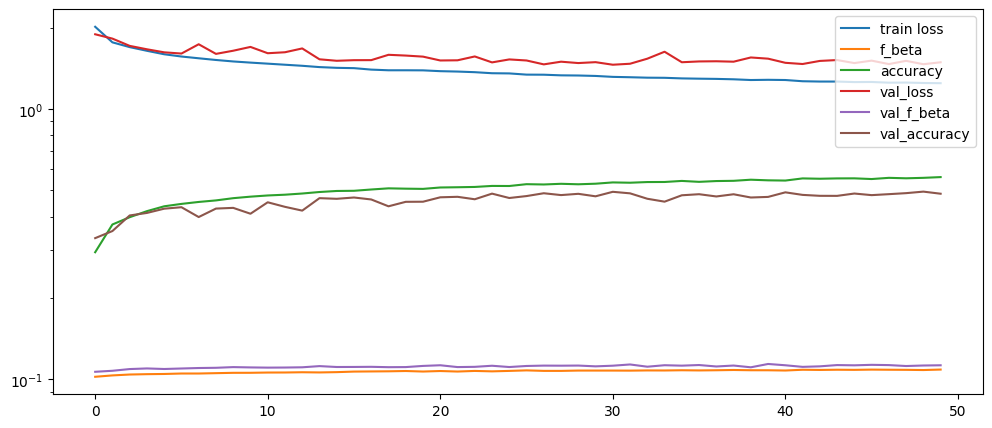

In [ ]:
fig, ax = plt.subplots(figsize=(12, 5))
ax.set_yscale('log')

ax.plot(history.history['loss'], label='train loss')
ax.plot(history.history['f_beta'], label='f_beta')
ax.plot(history.history['accuracy'], label='accuracy')
ax.plot(history.history['val_loss'], label='val_loss')
ax.plot(history.history['val_f_beta'], label='val_f_beta')
ax.plot(history.history['val_accuracy'], label='val_accuracy')
ax.legend();